
# Voyage relativiste
---



## Le voyage

Le voyage d'un astronaute se d√©roule dans un vaisseau spatial qui se d√©place le long d'une droite. Dans un r√©f√©rentiel inertiel, √©loign√© de toute masse (pas de gravitation), le vaisseau a une vitesse initiale nulle √† $t=0$ et on lui applique une force constante $F$ pendant une dur√©e $T$. Ainsi, il acc√©l√®re pour atteindre une vitesse maximale √† $t=T$, puis on lui applique une force $-F$ oppos√©e √† la pr√©cedente pour $T<t<3T$. Donc sa vitesse diminue, s'annule √† $t=2T$, puis prend une valeur maximale √† $t=3T$, oppos√©e √† celle atteinte √† $t=T$. Pour $3T<t<4T$, on applique enfin la m√™me force $F$ qu'au d√©part, de sorte qu'il ralentisse, puis retrouve son point de d√©part avec une vitesse nulle √† $t=4T$.

L'astronaute √† bord du vaisseau dispose d'une horloge qui mesure le **temps propre** not√© $\tau$ au cours du voyage, initialis√©e √† $0$ au d√©part. Une autre horloge rest√©e au point de d√©part mesurera le temps $t$, initialis√©e aussi √† $0$ au d√©part.

Quel seront les temps affich√©s par ces horloges √† l'arriv√©e ?

C'est l'occasion de faire un peu de **relativit√© restreinte** avec des **mobiles acc√©l√©r√©s**.

## Les calculs

Dans un r√©f√©rentiel inertiel, le principe fondamental de la dynamique en relativit√© restreinte s'√©crit, pour une force $F$, une masse $m$ et une vitesse $v$ :

$$F=\dfrac{d}{dt}\left( m\gamma v \right)$$

avec :

$$\gamma=\dfrac{1}{\sqrt{1-v^2}}$$

On utilise ici des **unit√©s r√©duites**, de sorte que $v=1$ corresponde √† la vitesse de la lumi√®re. Il en est de m√™me pour la distance, avec $x=1$ qui correspond √† la distance parcourue par la lumi√®re pendant $t=1s$, soit $299792458$ m, soit **une seconde-lumi√®re** (s.l.).

La force $F$ est choisie constante, avec $F=mg$, de sorte que l'astronaute **ressente la pesanteur terrestre** ($g=9.81/299792458$ s.l./s^2, attention aux unit√©s). Pour illustrer le principe du calcul, on ne d√©veloppera que sa premi√®re √©tape, pour $0<t<T$.

En int√©grant $F=\dfrac{d}{dt}\left( m\gamma v \right)=mg$, on obtient :

$$\gamma v=gt$$

Ainsi :

$$v=\dfrac{gt}{\sqrt{1+(gt)^2}}$$

La vitesse $v$ ne d√©passe jamais $1$ dans ce contexte relativiste. La m√©trique permettant d'acc√©der √† la variation de temps propre $d\tau$ pour une variation de temps $dt$ et un d√©placement $dx$ dans le r√©f√©rentiel inertiel est :

$$d\tau^2=dt^2-dx^2$$

(la forme simple de cette m√©trique r√©sulte du fait que l'on a utilis√© des unit√©s r√©duites)

Ainsi :

$$\left(\dfrac{d\tau}{dt}\right)^2=1-\left(\dfrac{dx}{dt}\right)^2=1-v^2=\dfrac{1}{1+(gt)^2}$$

Soit :

$$\dfrac{d\tau}{dt}=\dfrac{1}{\sqrt{1+(gt)^2}}$$

$$\dfrac{dx}{dt}=\dfrac{gt}{\sqrt{1+(gt)^2}}$$

Une **int√©gration num√©rique** donnera acc√®s √† $\tau$ et $x$ en fonction de $t$, avec un pas temporel de calcul suffisament petit (on peut d√©j√† proc√©der ainsi sans √™tre "expert en calcul litt√©ral des int√©grales").

La distance $x$ et le temps $t$ permettront de tracer des **lignes d'univers** ($x$ en abscisse et $t$ en ordonn√©e), sur lesquelles on visualisera le temps propre $\tau$ via des points correspondant √† des intervalles r√©guliers de temps propre. Pour les √©chelles lors du trac√© des courbes, on choisira plut√¥t le **jour** comme unit√© de temps et le **jour-lumi√®re** comme unit√© de distance.

On effectuera aussi une comparaison avec une version tr√®s simplifi√©e du voyage o√π la vitesse est constante √† l'aller et au retour et la distance parcourue identique.

## Le programme

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def d_tau_sur_dt(g, t):
    return np.sqrt(1/(1+g**2*t**2))


def vitesse(g, t):
    return g*t/np.sqrt(1+g**2*t**2)

# T : un quart de la dur√©e du voyage, en secondes
# g : acc√©l√©ration de la pesanteur ressentie, en m/s^2
# pasdelta : √©cart de temps entre deux points sur les lignes d'univers, en secondes


def calcul_dis_tau(T=3600*24*1000, g=9.81, pasdelta=3600*24*100):
    # pas temporel de calcul pour l'int√©gration num√©rique
    pas = T/1e4
    # vitesse de la lumi√®re en m/s
    c = 299792458
    # acc√©l√©ration en unit√© r√©duite
    g = g/c

    # 0<t<T
    ts = np.arange(0, T, pas)
    dtt = d_tau_sur_dt(g, ts)
    vit = vitesse(g, ts)
    t = ts.copy()

    # T<t<3*T
    ts = np.arange(-T, T, pas)
    dtt = np.append(dtt, d_tau_sur_dt(g, ts))
    vit = np.append(vit, -vitesse(g, ts))
    t = np.append(t, 2*T+ts)

    # 3*T<t<4*T
    ts = np.arange(0, T+pas, pas)
    dtt = np.append(dtt, d_tau_sur_dt(g, T-ts))
    vit = np.append(vit, -vitesse(g, T-ts))
    t = np.append(t, 3*T+ts)

    # int√©gration num√©rique
    dis = pas*np.cumsum(vit)
    tau = pas*np.cumsum(dtt)

    # calculs en vitesse constante
    dis_max = np.max(dis)
    V = dis_max/(2*T)
    tau2 = t*np.sqrt(1-V**2)
    vit2 = V*(t < 2*T)-V*(t >= 2*T)
    dis2 = pas*np.cumsum(vit2)

    # calculs pour le trac√© de tau √† intervalles temporels r√©guliers
    deltat = np.arange(0, t[-1], pasdelta)
    indext = [np.where(t >= dt)[0][0] for dt in deltat]
    deltatau = np.arange(0, tau[-1], pasdelta)
    indextau = [np.where(tau >= dt)[0][0] for dt in deltatau]
    deltatau2 = np.arange(0, tau2[-1], pasdelta)
    indextau2 = [np.where(tau2 >= dt)[0][0] for dt in deltatau2]

    # conversions en jours et en jours-lumi√®re
    t = t/(3600*24)
    tau = tau/(3600*24)
    tau2 = tau2/(3600*24)
    dis = dis/(3600*24)
    dis2 = dis2/(3600*24)

    # affichage des r√©sultats en texte
    print('\nR√©sultats num√©riques\n')
    print(f'Acc√©l√©ration ressentie : {g*c:.2f} m/s^2')
    print(f'Temps t final: {max(t)/365.25:.2f} ann√©es ({max(t):.2f} jours)')
    print(
        f'Temps tau final: {max(tau)/365.25:.2f} ann√©es ({max(tau):.2f} jours)')
    print(f'Vitesse maximale atteinte : {max(vit):.3f}c')
    print(
        f'Distance atteinte : {max(dis)/365.25:.2f} ann√©es-lumi√®re ({max(dis):.2f} jours-lumi√®re)')
    print('\nGraphiques\n')

    # trac√©s des graphiques
    plt.figure()
    plt.plot(t, t, 'r', label='temps (r√©f√©rentiel inertiel)')
    plt.plot(t, tau, 'b', label='temps propre (force constante)')
    plt.plot(t, tau2, 'g', label='temps propre (vitesse uniforme)')
    plt.xlabel('temps (jours)')
    plt.ylabel('temps propre (jours)')
    plt.grid('on')
    plt.text(t[-1], t[-1], f'{t[-1]:.2f} jours',
             ha='right', c='r', weight='bold')
    plt.text(t[-1], tau[-1], f'{tau[-1]:.2f} jours',
             ha='right', c='b', weight='bold')
    plt.text(t[-1], tau2[-1], f'{tau2[-1]:.2f} jours',
             ha='right', c='g', weight='bold')
    plt.legend()

    plt.figure()
    plt.plot(t, vit, 'b', label='vitesse (force constante)')
    plt.plot(t, vit2, 'g', label='vitesse (vitesse uniforme)')
    plt.grid('on')
    plt.xlabel('temps (jours)')
    plt.ylabel('vitesse (v/c)')
    n = np.where(t >= T/(3600*24))[0][0]
    plt.text(t[n], vit[n], f'{vit[n]:.3f}c', ha='right', c='b', weight='bold')
    plt.text(t[n], vit2[n], f'{vit2[n]:.3f}c',
             ha='right', c='g', weight='bold')
    plt.legend()

    plt.figure()
    plt.plot(np.zeros(len(t)), t, 'r', label='r√©f√©rentiel inertiel')
    plt.plot(dis, t, 'b', label='force constante')
    plt.plot(dis2, t, 'g', label='vitesse constante')
    plt.grid('on')
    plt.title('Lignes d\'univers')
    plt.ylabel('temps (jours)')
    plt.xlabel('distance (jours-lumi√®re)')
    plt.legend()

    plt.figure()
    plt.plot(np.zeros(len(t)), t, 'r', label='r√©f√©rentiel inertiel', lw=0.5)
    plt.plot(np.zeros(len(indext)), t[indext], 'r.', ms=8)
    plt.plot(0, t[-1], 'r.', ms=8)
    plt.plot(dis, t, 'b', label='force constante', lw=0.5)
    plt.plot(dis[indextau], t[indextau], 'b.', ms=8)
    plt.plot(dis2, t, 'g', label='vitesse constante', lw=0.5)
    plt.plot(dis2[indextau2], t[indextau2], 'gx', ms=6)
    plt.grid('on')
    plt.ylabel('temps (jours)')
    plt.xlabel('distance (jours-lumi√®re)')
    plt.title(
        f'Lignes d\'univers (pas de temps={pasdelta/(3600*24):.2f} jours)')
    plt.legend()

    plt.show()


## Les trac√©s


R√©sultats num√©riques

Acc√©l√©ration ressentie : 9.81 m/s^2
Temps t final: 10.95 ann√©es (4000.00 jours)
Temps tau final: 6.83 ann√©es (2493.49 jours)
Vitesse maximale atteinte : 0.943c
Distance atteinte : 3.87 ann√©es-lumi√®re (1414.01 jours-lumi√®re)

Graphiques



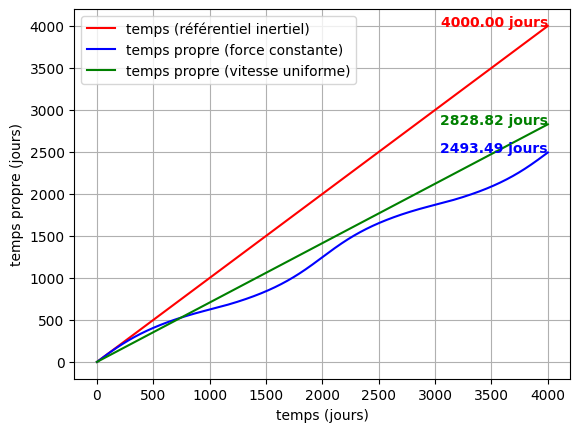

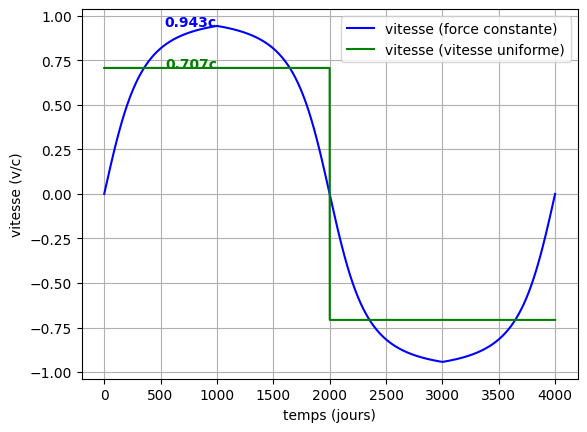

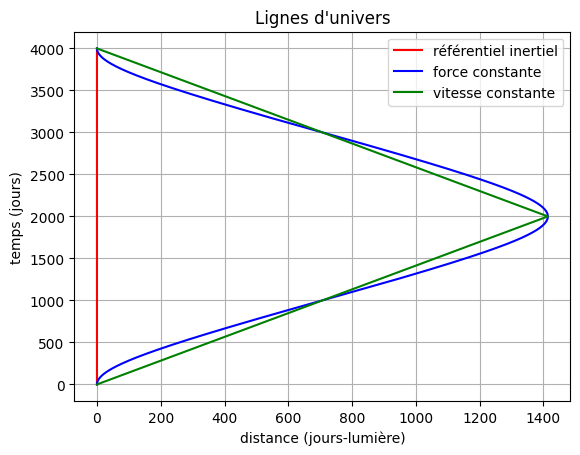

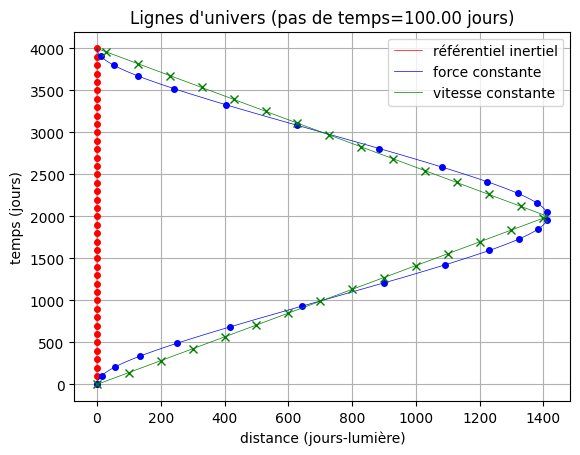

In [30]:
# T : un quart de la dur√©e du voyage, en secondes
# g : acc√©l√©ration de la pesanteur ressentie, en m/s^2
# pasdelta : √©cart de temps entre deux points sur les lignes d'univers, en secondes
calcul_dis_tau(T=3600*24*1000,g=9.81,pasdelta=3600*24*100)

## R√©sultats

Pour les trac√©s, on a choisi $T=1000$ jours. C'est le temps mis pour atteindre la vitesse $v=0.94$ avec une force appliqu√©e qui est constante, de sorte de l'astronaute ressente une pesanteur comparable √† celle qu'il ressentirait sur Terre. Le voyage au complet dure $4000$ jours pour un observateur rest√© sur place au point de d√©part. L'horloge dans le vaisseau affiche $2493.49$ jours √† la fin du voyage.

Avec le calcul classique o√π la vitesse est uniforme ($v=0.71$), l'horloge afficherait $2828.82$ jours √† la fin du voyage.

La distante atteinte lors du demi-tour est de $1414.01$ jours-lumi√®re pour les deux configurations.

## Conclusion

L'id√©e ici √©tait de proposer une version r√©aliste du voyage, o√π l'astronaute subit une gravit√© apparente de l'ordre de celle qu'il subit sur Terre. Lorsque la force change de signe, il y a √©videmment un changement notable o√π "le sol devient le plafond" dans le vaisseau, mais ce n'est pas insurmontable.

Avec le calcul classique o√π la vitesse change brusquement de signe au milieu du voyage, on n'est plus du tout dans le contexte r√©aliste envisag√©.

Mais si on veut s'interroger un peu plus sur le r√©alisme du voyage, il faut remarquer que la force appliqu√©e serait de l'ordre de celle qu'il faut appliquer ... pour faire d√©coller une fus√©e au d√©part de la Terre ! Pour cette fus√©e, il faut une √©nergie √©norme qui est par ailleurs fournie sur une dur√©e de l'ordre de quelques dizaines de secondes au moment de son d√©collage.

Et dans le voyage propos√©, il faudrait appliquer cette force pendant $4000$ jours. Donc on ne peut que rester dans l'exercice de pens√©e üòè

## Documents

Voyage relativiste : https://fr.wikipedia.org/wiki/Voyage_relativiste

The Relativistic Rocket :
https://math.ucr.edu/home/baez/physics/Relativity/SR/Rocket/rocket.html

Diagramme de Bondi : https://www.youtube.com/watch?v=mECIZ-jULjQ

Simultan√©it√© : https://www.youtube.com/watch?v=jib6EababqA

## Proxima Centauri


R√©sultats num√©riques

Acc√©l√©ration ressentie : 10.00 m/s^2
Temps t final: 11.80 ann√©es (4309.95 jours)
Temps tau final: 7.03 ann√©es (2569.49 jours)
Vitesse maximale atteinte : 0.952c
Distance atteinte : 4.30 ann√©es-lumi√®re (1569.99 jours-lumi√®re)

Graphiques



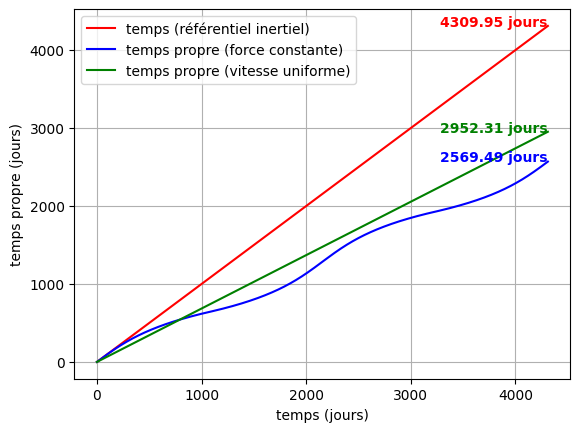

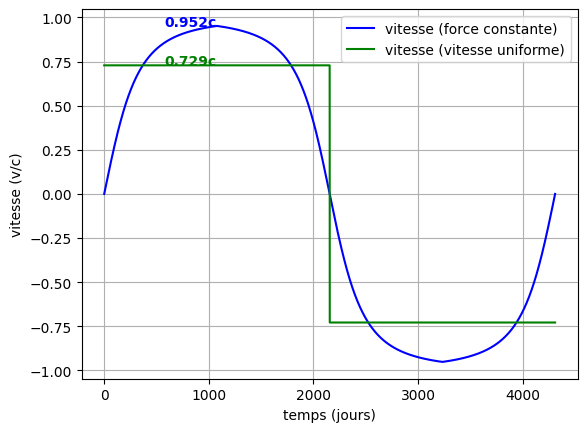

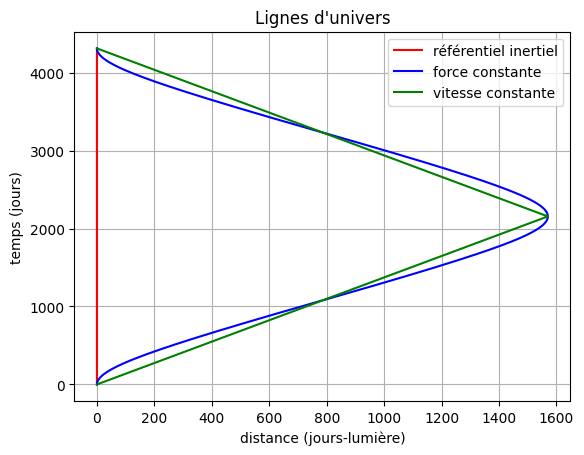

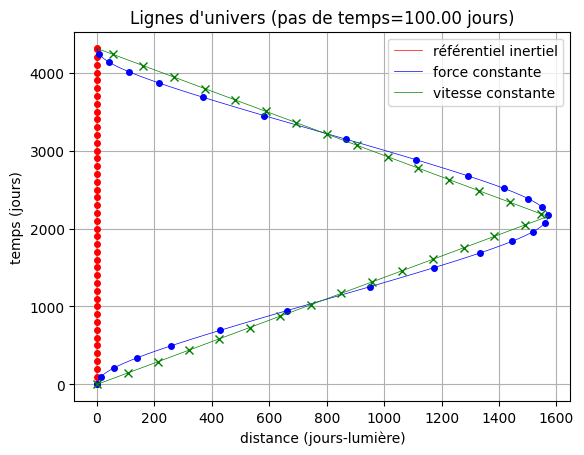

In [31]:
calcul_dis_tau(T=3600*24*365.25*11.8/4,g=10,pasdelta=3600*24*100)